# 1) Veille en Traitement du langage 

Parsing and tokenization ?


Vectorization ? Bag of words ?


Advantage of TFIDF ?


Stops words ?

https://docs.google.com/document/d/1p1eJt4l0cJZjILpwl9RcKvmSCZAUo17h7RSzA_1-Aa4/edit?ts=5fc6087c#heading=h.tflnadj1taqt


https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1

https://code.tutsplus.com/fr/tutorials/introducing-the-natural-language-toolkit-nltk--cms-28620

https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63

https://code.tutsplus.com/fr/tutorials/introducing-the-natural-language-toolkit-nltk--cms-28620

http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/smsSpamCollection.arff

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://github.com/dtrckd/simplon_datai_2020/blob/master/brief_4/brief.md

# 2) Load, clean and prepare the data

In [32]:
import nltk
#nltk.download('stopwords') à faire une fois

In [33]:
import numpy as np
import pandas as pd

In [34]:
sms= pd.read_csv('SMSSpamCollection.txt', sep='\t', names= ["Labels","Messages"])
print(len(sms))
print(sms.info())
sms.head(10)

5572
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    5572 non-null   object
 1   Messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


,Labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [35]:
labels = sms['Labels'].values # ham et spam
target = np.array([1 if x =='ham' else 0 for x in labels]) # transforme  ham en 1 sinon 0 donc spam
corpus = sms['Messages'].values #messages ecrit >sms

In [36]:
target

array([1, 1, 0, ..., 1, 1, 1])

In [37]:
labels

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

## Scikit learn

vectoriser avec sickit learn countvectorizer donne des 0 et de un. 
liste de label transformer en zéro et un faire un fit pour faire un modele
un peu detude regarder le max, les element qui apparaissen le plus de foi ete le moin de fois



fit_transform(): Learn the vocabulary dictionary and return document-term matrix. (sort un vecteur et tokenize filtre et vectorise extrait le vocabulaire, enleve la ponctuation et les stopwords si on lui donne )

CountVectorizer() : Convert a collection of text documents to a matrix of token counts. (module avec plusieurs methode. crée une instance en creant vectorizer (class). ne sutilise pas seul

get_feature_names(): Array mapping from feature integer indices to feature name.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = nltk.corpus.stopwords.words('english') # on utilise les stopwords de nltk car ceux de sickit learn ne sont pas suffisant 

vectorizer = CountVectorizer(stop_words=stopwords) # convertie,  une fois utilisé avec fit, du doc texte en matrice de token > mot à l'unité et suprimes les stop words definit

X = vectorizer.fit_transform(corpus) #convertie en matrice la liste de mot token trouvé dans Messages
sms_vecteur = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())


print(sms_vecteur)
print(X)
print(vectorizer.get_feature_names()) # liste des mots trouvé
print(X.toarray()) # transforme x en array

      00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0      0    0       0             0     0     0            0            0   
1      0    0       0             0     0     0            0            0   
2      0    0       0             0     0     0            0            0   
3      0    0       0             0     0     0            0            0   
4      0    0       0             0     0     0            0            0   
...   ..  ...     ...           ...   ...   ...          ...          ...   
5567   0    0       0             0     0     0            0            0   
5568   0    0       0             0     0     0            0            0   
5569   0    0       0             0     0     0            0            0   
5570   0    0       0             0     0     0            0            0   
5571   0    0       0             0     0     0            0            0   

      0125698789  02  ...  zhong  zindgi  zoe  zogtorius  zoom  zouk  zyada

In [206]:
#somme total de chaque mot mis dans un nouveau dataframe
def sms_sum(sms):
    s = sms.sum() #somme de la dataframe sms
    grouped = pd.concat([s], axis=1) # creation dataframe. on passe les mots en ligne (axis=1) et la somme de chaque en colonne ([s])
    grouped.columns = ['Labels_sum'] # donne le nom de la colonne créé
    y = grouped.sort_values('Labels_sum', ascending=ascending) #sort les valeurs de la df grouped, les mets dans la colonne defini et les range par ordre choisi
    return y


ascending=False
sms_sum(sms_vecteur)



#s = sms.sum() 
#grouped = pd.concat([s], axis=1) 
#grouped.columns = ['Labels_sum'] 
#Z = grouped.sort_values('Labels_sum', ascending=False) 
#Z[:10]    


,Labels_sum
call,593
get,391
ur,391
gt,318
lt,316
...,...
havbeen,1
hava,1
hav2hear,1
haunt,1


### Quelle sont les 10 mots les plus fréquent dans le jeux de données ?

In [132]:
#les 10 mots les plus utilisés
(sms_sum(sms_vecteur).head(10))

,Labels_sum
call,593
get,391
ur,391
gt,318
lt,316
ok,293
free,284
go,283
know,262
good,247


### Les moins fréquents ?

In [133]:
A =(sms_sum(sms_vecteur))
moins_frequents = A[(A.Labels_sum == 1)]
moins_frequents

,Labels_sum
toking,1
throwin,1
prometazine,1
token,1
purchases,1
...,...
havbeen,1
hava,1
hav2hear,1
haunt,1


### Tracer la distribution de la fréquence des mots présents dans le jeux de données. Qu'observez vous ?

In [207]:
def sms_freq(sms):
    f = sms.sum()/sum(sms.sum()) #frequence de la dataframe sms
    grouped = pd.concat([f], axis=1) # creation dataframe. on passe les mots en ligne (axis=1) et la frequence de chaque en colonne ([s])
    grouped.columns = ['Labels_freq'] # donne le nom de la colonne créé
    y = grouped.sort_values('Labels_freq', ascending=ascending) #sort les valeurs de la df grouped, les mets dans la colonne defini et les range par ordre choisi
    return y


ascending=False
sms_freq(sms_vecteur)
B = sms_freq(sms_vecteur)
B

,Labels_freq
call,0.011937
get,0.007871
ur,0.007871
gt,0.006401
lt,0.006361
...,...
havbeen,0.000020
hava,0.000020
hav2hear,0.000020
haunt,0.000020


In [209]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

dfValue = B

y = B['Labels_freq'].sort_values(ascending=False) 

trace = go.Bar(
                x = y.index.get_level_values(0).tolist(),
                y = y,
                name = "Le score universitaire pour le transfert de connaissances par pays",
                marker = dict(color = 'rgba(0, 0, 255, 0.5)',
                             line = dict(color ='rgb(255,0,0)',width =1.5)),
                text = y.index.get_level_values(0).tolist())

layout = go.Layout(barmode = "group")
fig = go.Figure(data = trace, layout = layout)
iplot(fig)


Text(0, 0.5, 'fréquence')

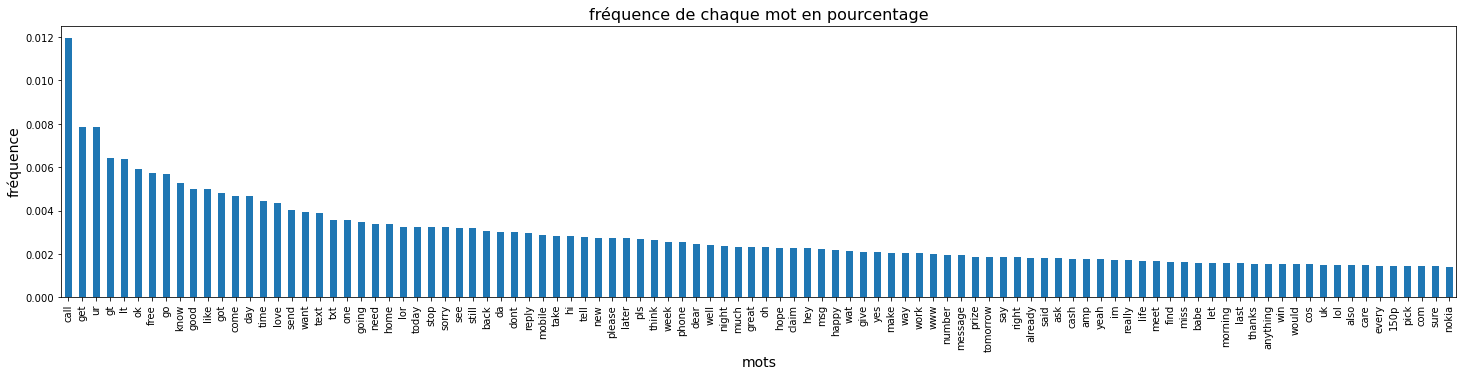

In [210]:
dfValues = B
dfValues = dfValues.iloc[:100,:]
#dfValue.income = pd.to_numeric(dfValue.income, errors='coerce')

#gkk = dfValue.groupby(['country', 'income']).mean() 

ax = dfValues['Labels_freq'].sort_values(ascending=False).plot(kind='bar', figsize = (25,5))

ax.set_xlabel('mots', fontsize=14)
ax.set_title("fréquence de chaque mot en pourcentage",fontsize=16)
ax.set_ylabel("fréquence", fontsize=14)

# 3) Apprentissage



Que représente la mesure f1 ? Quelles sont ces avantages sur d'autre mesure tel que la précision le rappel ou l'accuracy ?

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 

In [192]:
#défini les variable x et y 
#labels = sms['Labels'].values # ham et spam
#corpus = sms['Messages'].values #messages ecrit >sms
#sms_vecteur
#target = np.array([1 if x =='ham' else 0 for x in labels]) # transforme  ham en 1 sinon 0 donc spam

X = sms_vecteur.values
y = target 
#clt_apple['Purchased'].values

In [201]:
#training entraine le modèle et test verifie à partir de données que le modèle n'a pas eu. verif si ces predictions sont coherentes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [202]:
#construire le modèle
clr = LogisticRegression(max_iter = 1000)
clr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [203]:
#faire des prédictions > 98% de taux de fiabilité sur ce modèle
y_pred=clr.predict(X_test)
clr.score(X_test,y_test)

0.9829596412556054

In [204]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       160
           1       0.98      1.00      0.99       955

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



precision:La précision est le nombre de documents pertinents retrouvés rapporté au nombre de documents total                 proposé pour une requête donnée.
rappel:Le rappel est défini par le nombre de documents pertinents retrouvés au regard du nombre de documents              pertinents que possède la base de données.
accuracy:il indique le pourcentage de bonnes prédictions.
F1score:Le F1 score est la moyenne harmonique de la précision et du rappel.                                       

# 4) Veille cross validation 

https://scikit-learn.org/stable/modules/cross_validation.html

Utilisez la méthode de ShuffleSplit pour construire vos jeux de données permettant la validation croisée.